# We Rate Dogs Project

## Content
* [Data Wrangling](#wrangle)
    * [Data Gathering](#gather)
    * [Data Assessing](#assess)
    * [Data Cleaning](#clean)
* [Data Exploration](#explore)
* [Data Visualization](#visual)

In [77]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sb

%matplotlib inline

<a id='wrangle'></a>
## Data Wrangling

<a id='gather'></a>
### Data Gathering

In [78]:
# create the archive dataframe from csv file
df_archive = pd.read_csv('data/twitter-archive-enhanced.csv')

In [79]:
# getting the file using requests package
link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_predictions = requests.get(link)

# write the file in local disk 
with open('data/image_predictions.tsv', mode='wb') as file:
    file.write(image_predictions.content)
    
# create the image predictions dataframe from tsv file    
df_image_predictions = pd.read_csv('data/image_predictions.tsv', sep='\t')

In [80]:
tweets = []

# reading the text file
with open('data/tweet-json.txt') as json_file:
    # looping through all lines in the file
    for line in json_file:
        # reading the line using json package
        data = json.loads(line)
        
        # saving line inforamtion in tweet variable
        tweet = {'tweet_id': data['id'],
             'retweet': data['retweet_count'],
             'favorite': data['favorite_count']}
        
        # holding tweet variable in tweets list
        tweets.append(tweet)
        
df_tweets = pd.DataFrame(tweets)

In [81]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
df_tweets.head()

,favorite,retweet,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


<a id='assess'></a>
### Data Assessing

* archive table
    * name column contains 'None' string rather than numpy's NaN  object
    * tweet_id should be string type not int64 type
    * timestamp column is string not a datetime object
    * doggo, floofer, pupper and puppo columns should be restructured
    * there are 55 dogs with name "a" and 8 with name "the" and 7 with name "an" and 4 with name "just"
    * rating_numerator and rating_denominator columns are has alot of missleading values
    * tweet with id 832088576586297345 is just starting account tweet
    * make all rating denominator 10 based
    * there are some numerator that are above 20
* image predictions table
    * tweet_id should be string type not int64 type
    * p1, p2 and p3 columns contains underscore
* tweets table
    * tweet_id should be string type not int64 type
    * tweets table should be part of archive table

In [8]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite    2354 non-null int64
retweet     2354 non-null int64
tweet_id    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [11]:
df_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
the            8
Sadie          8
Buddy          7
an             7
Daisy          7
Toby           7
Bailey         7
Leo            6
Bella          6
Jack           6
Dave           6
Jax            6
Milo           6
Oscar          6
Stanley        6
Rusty          6
Scout          6
Koda           6
Sammy          5
            ... 
Spanky         1
Maude          1
Tyrus          1
Dudley         1
Iggy           1
Remy           1
Mary           1
Bloop          1
Willie         1
Mona           1
Harnold        1
Bobbay         1
Gustaf         1
Norman         1
Ozzie          1
Grey           1
Julius         1
Tiger          1
Sojourner      1
Tuck           1
Ebby           1
Obie           1
Halo           1
Maisey         1
Rupert         1
Sailor         1
Jimbo          1
Sunshine      

In [12]:
df_archive.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [13]:
df_archive[df_archive.rating_denominator != 10][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']].values

array([[835246439529840640,
        "@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
        960, 0],
       [832088576586297345, '@docmisterio account started on 11/15/15',
        11, 15],
       [820690176645140481,
        'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
        84, 70],
       [810984652412424192,
        'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
        24, 7],
       [775096608509886464,
        'RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…',
        9, 11],
       [758467244762497024,
        'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
        165, 150],
       [740373189193256964,
        'After

<a id='clean'></a>
### Data Cleaning

first we should take a copy from each data frame to prevent losing data

In [82]:
# making copy dataframes to clean them
df_archive_clean = df_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweets_clean = df_tweets.copy()

#### define

tweet_id in all tables are contain categorical values so it should be string rather than int64

#### code

In [83]:
# using astype function to convert series type
df_archive_clean.tweet_id = df_archive_clean.tweet_id.astype(np.str)
df_image_predictions_clean.tweet_id = df_image_predictions_clean.tweet_id.astype(np.str)
df_tweets_clean.tweet_id = df_tweets_clean.tweet_id.astype(np.str)

#### test

In [86]:
# using dtype property to check series type ('O' means python object) 
df_archive_clean.tweet_id.dtype

dtype('O')

In [17]:
# using dtype property to check series type ('O' means python object) 
df_image_predictions_clean.tweet_id.dtype

dtype('O')

In [88]:
# using dtype property to check series type ('O' means python object) 
df_tweets_clean.tweet_id.dtype

dtype('O')

### --------------------------------------------------------------------------------------------------------------------------------------------------------------
#### define

doggo, floofer, pupper and puppo columns should be restructured using melt function 

#### code

In [89]:
# listing all columns except these we want to melt
columns = df_archive_clean.columns[:-4]
# using melt function for restructuring the dataframe
df_archive_clean = pd.melt(df_archive_clean, id_vars=columns, value_vars=['doggo', 'floofer', 'pupper', 'puppo'], value_name="dog_breed")
# deleting unnecessary 'variable' column 
df_archive_clean.drop(columns='variable', axis=1, inplace=True)
# droping duplicated rows
df_archive_clean.drop_duplicates(inplace=True)

#### test

In [20]:
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


In [90]:
df_archive_clean.shape

(2750, 14)

### --------------------------------------------------------------------------------------------------------------------------------------------------------------
#### define

raplace names with 'None' values to be numpy's NaN 

#### code

In [91]:
# using replace function to replace 'None' with numpy's NaN
df_archive_clean['name'].replace('None', np.nan, inplace=True)

#### test

In [92]:
# using shape property to check 'None' in 'name' column
df_archive_clean[df_archive_clean.name == 'None'].shape[0]

0

### --------------------------------------------------------------------------------------------------------------------------------------------------------------
#### define

there are 55 dogs with name "a" and 8 with name "the" and 7 with name "an" and 4 with name "just" 
switch these name with None

#### code

In [101]:
# listing some wrong names
wrong_names = ['a', 'the', 'an', 'just']

def correct(row):
    # check if name in the list
    if row['name'] in wrong_names:
        return None
    else:
        return row['name']
# using apply function to replace listed wrong names
df_archive_clean['name'] = df_archive_clean.apply(correct, axis=1)

#### test

In [104]:
# checking if there is wrong names in column 'name'
df_archive_clean.name.isin(wrong_names).sum()

0

### --------------------------------------------------------------------------------------------------------------------------------------------------------------
### define

p1, p2 and p3 columns contains underscore
replace the underscore with space

#### code

In [94]:
# using str.replace fonction to replace '_' with space
df_image_predictions_clean['p1'] = df_image_predictions_clean['p1'].str.replace('_', ' ')
df_image_predictions_clean['p2'] = df_image_predictions_clean['p2'].str.replace('_', ' ')
df_image_predictions_clean['p3'] = df_image_predictions_clean['p3'].str.replace('_', ' ')

#### test

In [30]:
# number of rows  in p1 that contains '_'
df_image_predictions_clean.p1.str.contains('_').sum()

0

In [31]:
# number of rows  in p2 that contains '_'
df_image_predictions_clean.p2.str.contains('_').sum()

0

In [95]:
# number of rows  in p3 that contains '_'
df_image_predictions_clean.p3.str.contains('_').sum()

0

### --------------------------------------------------------------------------------------------------------------------------------------------------------------
#### define

change the timestamp column in archive table from string type to datetime type

#### code

In [33]:
# using pandas's to_datetime function to convert the type to datatime
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)

#### test

In [34]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 0 to 8151
Data columns (total 14 columns):
tweet_id                      2750 non-null object
in_reply_to_status_id         87 non-null float64
in_reply_to_user_id           87 non-null float64
timestamp                     2750 non-null datetime64[ns, UTC]
source                        2750 non-null object
text                          2750 non-null object
retweeted_status_id           219 non-null float64
retweeted_status_user_id      219 non-null float64
retweeted_status_timestamp    219 non-null object
expanded_urls                 2685 non-null object
rating_numerator              2750 non-null int64
rating_denominator            2750 non-null int64
name                          1752 non-null object
dog_breed                     2750 non-null object
dtypes: datetime64[ns, UTC](1), float64(4), int64(2), object(7)
memory usage: 322.3+ KB


### --------------------------------------------------------------------------------------------------------------------------------------------------------------
#### define

tweets table should be part of archive table


#### code

In [35]:
# using pandas's merge function to merge two dataframes
df_archive_clean= pd.merge(df_archive_clean, df_tweets_clean, on='tweet_id')

#### test

In [36]:
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,favorite,retweet
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,41048,9774


### --------------------------------------------------------------------------------------------------------------------------------------------------------------
#### define

tweet with id 832088576586297345 is just starting account tweet so delete it

#### code

In [105]:
# using query function to delete the tweet
df_archive_clean = df_archive_clean.query('tweet_id != 832088576586297345')

#### test

In [106]:
# checking how many tweet_id with the id
(df_archive_clean.tweet_id == 832088576586297345).sum()

0

### --------------------------------------------------------------------------------------------------------------------------------------------------------------
#### define

make all rating denominator 10 based

#### code

In [39]:
df_archive_clean['rating_numerator'] = (df_archive_clean.rating_numerator // (df_archive_clean.rating_denominator / 10))
df_archive_clean['rating_denominator'] = 10

#### test

In [40]:
df_archive_clean.rating_numerator.value_counts()

12.0      666
11.0      555
10.0      531
13.0      416
9.0       174
8.0       122
14.0       73
7.0        64
5.0        40
6.0        34
3.0        20
4.0        16
2.0        11
1.0         8
420.0       2
27.0        2
75.0        2
0.0         2
15.0        2
17.0        1
182.0       1
26.0        1
1776.0      1
666.0       1
34.0        1
Name: rating_numerator, dtype: int64

### --------------------------------------------------------------------------------------------------------------------------------------------------------------
#### define

there are some numerator that are above 20 
delete those rows

#### code

In [41]:
df_archive_clean = df_archive_clean[df_archive_clean.rating_numerator <= 20] 

#### test

In [42]:
df_archive_clean.query('rating_numerator > 50').shape[0]

0

<a id='explore'></a>
## Data Exploration

#### Top 10 dog names

In [43]:
df_archive_clean.name.value_counts()[:10]

Cooper     14
Oliver     14
Charlie    13
Bo         13
Lucy       12
Lola       11
Penny      10
Tucker     10
Winston    10
Milo        8
Name: name, dtype: int64

#### TOP 10 dog breed (more than %70 confidence)

In [44]:
df_image_predictions_clean[(df_image_predictions_clean.p1_conf > 0.70) & (df_image_predictions_clean.p1_dog == True)]['p1'].value_counts()[:10]

golden retriever      92
Pembroke              52
Labrador retriever    52
pug                   37
Chihuahua             34
Samoyed               25
Pomeranian            23
French bulldog        19
chow                  19
toy poodle            15
Name: p1, dtype: int64

#### Total number of dog breeds in the dataset (more than %70 confidence)

In [45]:
df_image_predictions_clean[(df_image_predictions_clean.p1_conf > 0.70) & (df_image_predictions_clean.p1_dog == True)]['p1'].nunique()

84

<a id='visual'></a>
## Data Visualization

In [116]:
# creating a dataframe that combine two dataframs for more explorations
df_famous_breed = pd.merge(df_tweets_clean, df_image_predictions_clean, on='tweet_id', how='right')
# deleting picture with less than %70 confidence  
df_famous_breed = df_famous_breed[(df_famous_breed.p1_conf > 0.70) & (df_famous_breed.p1_dog == True)]

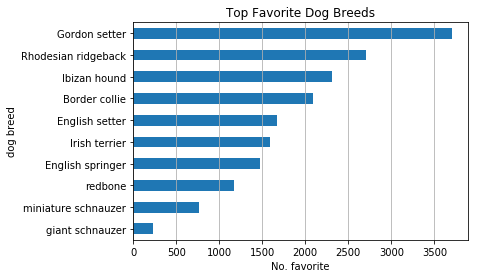

In [119]:
# ploting horizontal bar chart using pandas's plot function  
df_famous_breed.groupby(by='p1').sum().favorite.sort_values()[:10].plot(kind='barh')
# setting grid 
plt.grid(axis='x')
# setting title
plt.title('Top Favorite Dog Breeds')
# setting y lable
plt.ylabel('dog breed')
# setting x lable
plt.xlabel('No. favorite')
# ploting the chart on the screen
plt.show()

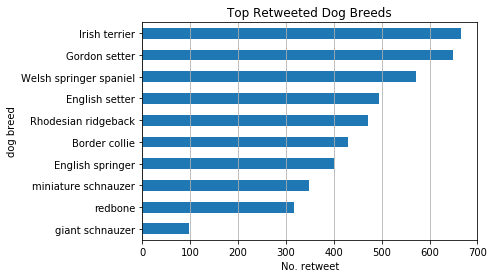

In [115]:
# ploting horizontal bar chart using pandas's plot function  
df_famous_breed.groupby(by='p1').sum().retweet.sort_values()[:10].plot(kind='barh')
# setting grid 
plt.grid(axis='x')
# setting title
plt.title('Top Retweeted Dog Breeds')
# setting y lable
plt.ylabel('dog breed')
# setting x lable
plt.xlabel('No. retweet')
plt.show()